 [](http://)

1. [Here We Go!](#section-one)
2. [Talking About Dataset.](#section-two)
4. [Analysis.](#section-three)

[Google Colab](https://colab.research.google.com/drive/1d7FPxOYrUZGpfx4CvBHcikItKv6FRC7O#scrollTo=7CcDXdkMZtnN)

[GitHub Repository](https://github.com/AbdullahGoma/AirlinePassenger_Clustering)

<a id="section-one"></a>
# Here We Go!

* [Python Libraries](#1)
* [Data Loading](#2)
* [Data Preprocessing](#3)

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv), Pandas is a powerful data manipulation and analysis library.
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

<ipython-input-2-894e3cb4b8e7>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [4]:
# DataFrame object that will hold the data read from the CSV file
DataFrame = pd.read_csv('1_Air_Traffic_Passenger_Statistics.csv')

In [5]:
# rename(): This is a pandas function used to rename columns in a DataFrame.

DataFrame.rename(columns = {
    'Activity Period': 'Activity_Period',  # Rename column 'Activity Period' to 'Activity_Period'
    'Operating Airline': 'Operating_Airline',  # Rename column 'Operating Airline' to 'Operating_Airline'
    'Operating Airline IATA Code': 'Operating_Cod',  # Rename column 'Operating Airline IATA Code' to 'Operating_Cod'
    'Published Airline': 'Published_Airline',  # Rename column 'Published Airline' to 'Published_Airline'
    'Published Airline IATA Code': 'Published_Airline_IATA_Code',  # Rename column 'Published Airline IATA Code' to 'Published_Airline_IATA_Code'
    'GEO Summary': 'GEO_Summary',  # Rename column 'GEO Summary' to 'GEO_Summary'
    'GEO Region': 'GEO_Region',  # Rename column 'GEO Region' to 'GEO_Region'
    'Activity Type Code': 'Activity_Type_Code',  # Rename column 'Activity Type Code' to 'Activity_Type_Code'
    'Price Category Code': 'Price_Category_Code',  # Rename column 'Price Category Code' to 'Price_Category_Code'
    'Boarding Area': 'Boarding_Area',  # Rename column 'Boarding Area' to 'Boarding_Area'
    'Passenger Count': 'Passenger_Count',  # Rename column 'Passenger Count' to 'Passenger_Count'
    'Adjusted Activity Type Code': 'Adjusted_Activity_Type_Code',  # Rename column 'Adjusted Activity Type Code' to 'Adjusted_Activity_Type_Code'
    'Adjusted Passenger Count': 'Adjusted_Passenger_Count'  # Rename column 'Adjusted Passenger Count' to 'Adjusted_Passenger_Count'
}, inplace=True) # inplace=True: This parameter indicates that the changes should be applied directly to the original DataFrame without returning a new DataFrame.

In [6]:
# Get the column labels
DataFrame.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Cod',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [7]:
# Return the first 10 rows
DataFrame.head(10)

,Activity_Period,Operating_Airline,Operating_Cod,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July


In [8]:
# Generate descriptive statistics for the 'Adjusted_Passenger_Count' column
DataFrame['Adjusted_Passenger_Count'].describe()

count     15007.000000
mean      29331.917105
std       58284.182219
min           1.000000
25%        5495.500000
50%        9354.000000
75%       21182.000000
max      659837.000000
Name: Adjusted_Passenger_Count, dtype: float64

In [9]:
# Generate descriptive statistics for all numerical columns
DataFrame.describe()

,Activity_Period,Passenger_Count,Adjusted_Passenger_Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


In [10]:
# Count the occurrences of each unique value in the 'GEO_Summary' column
DataFrame.GEO_Summary.value_counts()

GEO_Summary
International    9210
Domestic         5797
Name: count, dtype: int64

In [11]:
# This code will generate a sunburst chart showing the hierarchical distribution of passenger counts
# based on the 'GEO_Summary' column in the DataFrame.
# Create the sunburst chart
fig = px.sunburst(DataFrame, path=['GEO_Summary'], values='Passenger_Count')
# Show the chart
fig.show()

Domestic flights is more than 3/4 of the total flights

In [12]:
# Calculates the frequency of each unique value in the 'GEO_Region' column.
DataFrame.GEO_Region.value_counts()

GEO_Region
US                     5797
Asia                   3273
Europe                 2089
Canada                 1418
Mexico                 1115
Australia / Oceania     737
Central America         274
Middle East             214
South America            90
Name: count, dtype: int64

<ipython-input-13-315c2673616b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




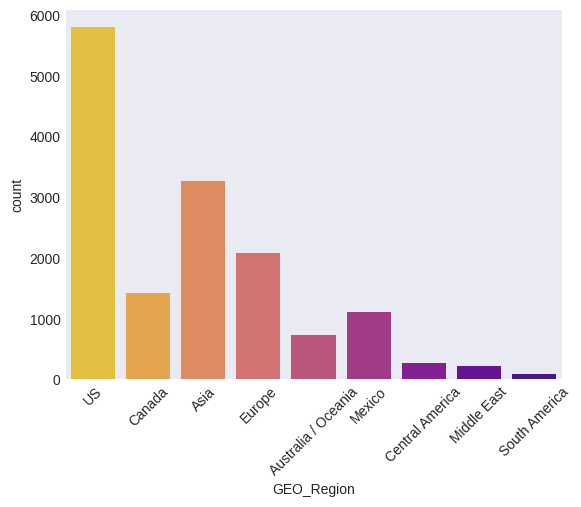

In [13]:
# Creates a count plot where DataFrame is the DataFrame containing the data, "GEO_Region" is the column to be plotted on the x-axis, and
# "plasma_r" is the color palette used for the plot.
# => The count plot displays the frequency of each unique value in the "GEO_Region" column.
sns.countplot(data=DataFrame,x="GEO_Region",palette="plasma_r")
# rotates the x-axis labels by 45 degrees to prevent overlapping when the region names are long
plt.xticks(rotation=45)
# Displays the plot
plt.show()

In [14]:
# Creates a strip plot using Plotly Express to visualize the distribution of adjusted passenger counts across different geographical regions. Each point represents an observation.
# The points are colored based on the geographical region.
fig = px.strip(DataFrame, x='GEO_Region', y='Adjusted_Passenger_Count', color="GEO_Region")
fig.show()

Majority of the flights are in US, followed by Asia and Europe

In [17]:
# Count the occurrences of each unique value in the 'Activity_Type_Code' column
DataFrame.Activity_Type_Code.value_counts()

Activity_Type_Code
Deplaned          7071
Enplaned          7016
Thru / Transit     920
Name: count, dtype: int64

<ipython-input-18-a31d432a0e17>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




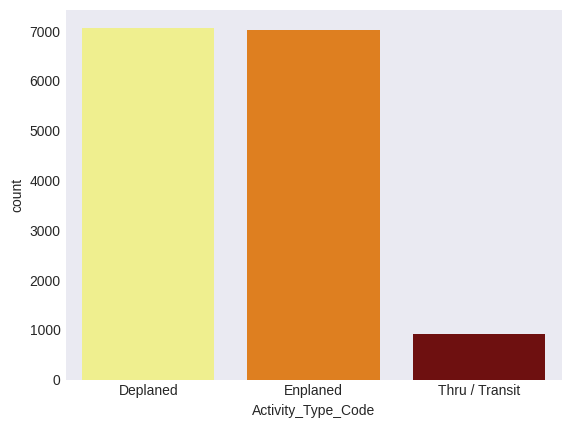

In [18]:
# countplot function to visualize the counts of each unique value in the 'Activity_Type_Code' column of your DataFrame.
# Each unique activity type code is represented on the x-axis, and the count of occurrences is represented on the y-axis
sns.countplot(data=DataFrame,x="Activity_Type_Code",palette="afmhot_r")
plt.show()

In [19]:
# Counts the occurrences of each unique value in the 'Price_Category_Code' column
DataFrame.Price_Category_Code.value_counts()

Price_Category_Code
Other       13087
Low Fare     1920
Name: count, dtype: int64

In [21]:
# path=['Price_Category_Code']: This specifies the column in the DataFrame that represents the hierarchical structure of the data
# values='Passenger_Count': This specifies the column in the DataFrame that contains the values to be visualized
fig = px.sunburst(DataFrame, path=['Price_Category_Code'], values='Passenger_Count')
fig.show()

Not a lot of flights were offered at a low price

In [24]:
# Display the counts of unique values in the 'Terminal' column
DataFrame.Terminal.value_counts()

Terminal
International    9197
Terminal 1       3241
Terminal 3       2218
Terminal 2        324
Other              27
Name: count, dtype: int64

<ipython-input-26-d42c7cd20a2e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




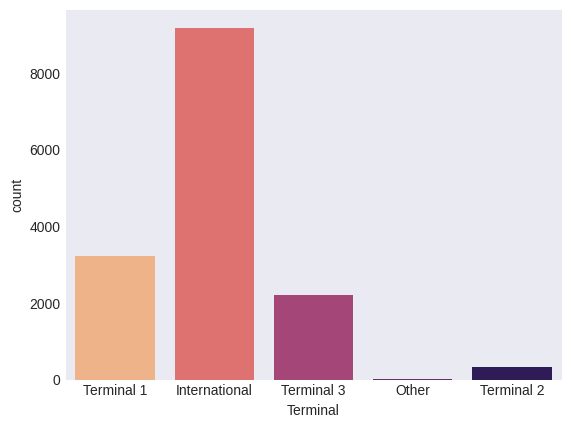

In [26]:
# countplot(): shows the distribution of values in the 'Terminal' column
# The color palette used for the bars is 'magma_r', which provides a sequential color scheme from dark to light.
sns.countplot(data=DataFrame,x="Terminal",palette="magma_r")
plt.show()

In [29]:
# Visualizes hierarchical data, with each level of the hierarchy represented by a ring. In this case, the hierarchy is defined by the 'Terminal' column
fig = px.sunburst(DataFrame, path=['Terminal'], values='Passenger_Count')
fig.show()

Most flights used the International terminal than others, but the highest passenger count occurs at Terminal 3 instead

In [30]:
# Count the occurrences of each unique value in the 'Boarding_Area' column
DataFrame.Boarding_Area.value_counts()

Boarding_Area
A        5225
G        3992
B        1993
F        1377
C        1228
E         841
D         324
Other      27
Name: count, dtype: int64

In [31]:
fig = px.sunburst(DataFrame, path=['Boarding_Area'], values='Passenger_Count')
fig.show()

In [32]:
DataFrame.Month.value_counts()

Month
August       1310
July         1303
September    1297
October      1295
January      1268
November     1263
December     1259
February     1255
March        1253
June         1183
May          1172
April        1149
Name: count, dtype: int64

<ipython-input-34-d97f38a02c76>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




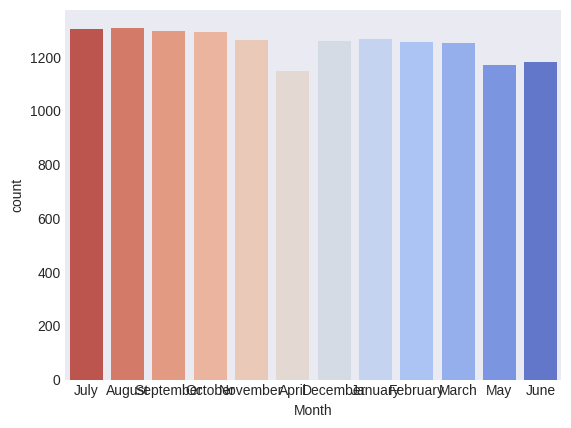

In [34]:
sns.countplot(data=DataFrame,x="Month",palette="coolwarm_r")
plt.show()

December seems to be the lowest number of flight(could be due to bad weather such as winter), whereas highest flight occurs during Jul-Aug, likely due to the summer holiday period

In [36]:
# This plot will help visualize the distribution of adjusted passenger counts across different years and provide insights into any trends or patterns over time.
fig = px.histogram(DataFrame, x="Year", y="Adjusted_Passenger_Count", color="Year",
                   marginal="box", # or violin, rug
                   hover_data=DataFrame.columns)
fig.show()

Number of passengers has been steadily increasing since 2006, exceeding over 50M in 2015

<a id="section-two"></a>
# Talking About Dataset

## About Dataset
## Airlines Traffic Passenger Statistics

* A New Look at an Old Problem
* About this dataset

This dataset contains information on air traffic passenger statistics by the airline. It includes information on the airlines, airports, and regions that the flights departed from and arrived at. It also includes information on the type of activity, price category, terminal, boarding area, and number of passengers.

* How to use the dataset

Air traffic passenger statistics can be a useful tool for understanding the airline industry and for making travel plans. This dataset from Open Flights contains information on air traffic passenger statistics by airline for 2017. The data includes the number of passengers, the operating airline, the published airline, the geographic region, the activity type code, the price category code, the terminal, the boarding area, and the year and month of the flight.

Research Ideas

Air traffic passenger statistics could be used to predict future trends in air travel.
The data could be used to generate heat maps of airline traffic patterns.
The data could be used to study the effects of different factors on air traffic passenger numbers, such as the time of year or day, the price of airfare, or the number of flights offered by an airline.

## Features Illustrations

1- Activity Period -> The date of the activity. (Date)

2- Operating Airline -> The airline that operated the flight. (String)

3-- Operating Airline IATA Code -> Operating Airline IATA Code

4- Published Airline -> The airline that published the fare for the flight. (String)

5- Published Airline IATA Code -> The IATA code of the airline that published the fare for the flight. (String)

6- GEO Summary -> A summary of the geographic region. (String)

7- GEO Region -> The geographic region. (String)

8- Activity Type Code -> The type of activity. (String)

9- Price Category Code -> The price category of the fare. (String)

10- Terminal -> The terminal of the flight. (String)

11- Boarding Area -> The boarding area of the flight. (String)

12- Passenger Count -> The number of passengers on the flight. (Integer)

13- Adjusted Activity Type Code -> The type of activity, adjusted for missing data. (String)

14- Adjusted Passenger Count -> The number of passengers on the flight, adjusted for missing data. (Integer)

15- Year -> The year of the activity. (Integer)

16- Month -> The month of the activity. (Integer)

<a id="section-three"></a>
# Analysis

* 1.[K-MEANS](#1)
* 2.[Hierarcihal Cluster](#2)
* 3.[Conclusion](#3)

<a id="1"></a>
## 1.K-MEANS

Encoding

In [60]:
# DataFrame object that will hold the data read from the CSV file
DataFrame = pd.read_csv('1_Air_Traffic_Passenger_Statistics.csv')
# rename(): This is a pandas function used to rename columns in a DataFrame.

DataFrame.rename(columns = {
    'Activity Period': 'Activity_Period',  # Rename column 'Activity Period' to 'Activity_Period'
    'Operating Airline': 'Operating_Airline',  # Rename column 'Operating Airline' to 'Operating_Airline'
    'Operating Airline IATA Code': 'Operating_Cod',  # Rename column 'Operating Airline IATA Code' to 'Operating_Cod'
    'Published Airline': 'Published_Airline',  # Rename column 'Published Airline' to 'Published_Airline'
    'Published Airline IATA Code': 'Published_Airline_IATA_Code',  # Rename column 'Published Airline IATA Code' to 'Published_Airline_IATA_Code'
    'GEO Summary': 'GEO_Summary',  # Rename column 'GEO Summary' to 'GEO_Summary'
    'GEO Region': 'GEO_Region',  # Rename column 'GEO Region' to 'GEO_Region'
    'Activity Type Code': 'Activity_Type_Code',  # Rename column 'Activity Type Code' to 'Activity_Type_Code'
    'Price Category Code': 'Price_Category_Code',  # Rename column 'Price Category Code' to 'Price_Category_Code'
    'Boarding Area': 'Boarding_Area',  # Rename column 'Boarding Area' to 'Boarding_Area'
    'Passenger Count': 'Passenger_Count',  # Rename column 'Passenger Count' to 'Passenger_Count'
    'Adjusted Activity Type Code': 'Adjusted_Activity_Type_Code',  # Rename column 'Adjusted Activity Type Code' to 'Adjusted_Activity_Type_Code'
    'Adjusted Passenger Count': 'Adjusted_Passenger_Count'  # Rename column 'Adjusted Passenger Count' to 'Adjusted_Passenger_Count'
}, inplace=True) # inplace=True: This parameter indicates that the changes should be applied directly to the original DataFrame without returning a new DataFrame.

In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate over each column to encode
for col in DataFrame.columns:
    # Check if the column is one of the one-hot encoded columns
    if 'Operating_Airline_' in col:
        # Encode the column
        DataFrame[col] = le.fit_transform(DataFrame[col])

In [64]:
# This preprocessing step is commonly done in machine learning workflows to convert categorical variables into a format that can be used by machine learning algorithms, which typically require numerical input. The LabelEncoder assigns a unique integer to each unique category in the categorical variables.
DataFrame["Operating_Airline"]=le.fit_transform(DataFrame["Operating_Airline"])
DataFrame["Operating_Cod"]=le.fit_transform(DataFrame["Operating_Cod"])
DataFrame["Published_Airline"]=le.fit_transform(DataFrame["Published_Airline"])
DataFrame["Published_Airline_IATA_Code"]=le.fit_transform(DataFrame["Published_Airline_IATA_Code"])
DataFrame["GEO_Summary"]=le.fit_transform(DataFrame["GEO_Summary"])
DataFrame["GEO_Region"]=le.fit_transform(DataFrame["GEO_Region"])
DataFrame["Activity_Type_Code"]=le.fit_transform(DataFrame["Activity_Type_Code"])
DataFrame["Price_Category_Code"]=le.fit_transform(DataFrame["Price_Category_Code"])
DataFrame["Terminal"]=le.fit_transform(DataFrame["Terminal"])
DataFrame["Boarding_Area"]=le.fit_transform(DataFrame["Boarding_Area"])
DataFrame["Adjusted_Activity_Type_Code"]=le.fit_transform(DataFrame["Adjusted_Activity_Type_Code"])
DataFrame["Month"]=le.fit_transform(DataFrame["Month"])

In [65]:
DataFrame.head()

,Activity_Period,Operating_Airline,Operating_Cod,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,0,60,0,54,0,8,0,0,2,1,27271,0,27271,2005,5
1,200507,0,60,0,54,0,8,1,0,2,1,29131,1,29131,2005,5
2,200507,0,60,0,54,0,8,2,0,2,1,5415,2,10830,2005,5
3,200507,4,6,4,6,1,2,0,1,2,1,35156,0,35156,2005,5
4,200507,4,6,4,6,1,2,1,1,2,1,34090,1,34090,2005,5


In [67]:
from sklearn.cluster import KMeans

# Instantiate the KMeans object and fit it to DataFrame
kmeans = KMeans(n_init=10).fit(DataFrame)

### let's find the optimum number of clusters

In [70]:
# Initializes an empty list
score=[]
# Creates a range of values from 1 to 9
K=range(1,10)
# Iterates over each value in the range of clusters
for i in K:
    kmeans=KMeans(n_clusters=i, init="k-means++", n_init=10 ,random_state=0)
    kmeans.fit(DataFrame) # This fits the KMeans model to data
    score.append(kmeans.inertia_) # Appends the inertia of the fitted model to the score list

### Visualize

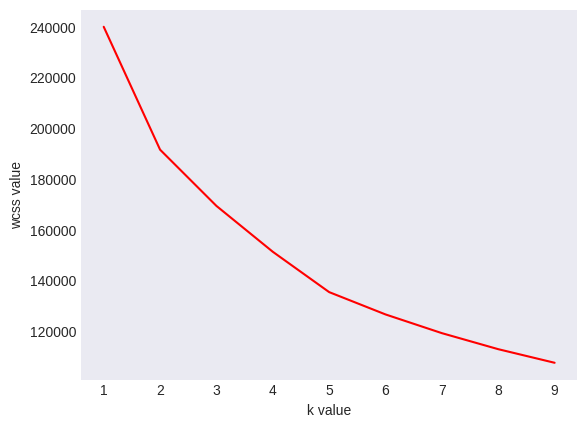

In [87]:
plt.plot(K,score,color="red")
plt.xlabel("k value") # This sets the label for the x-axis as "k value", representing the number of clusters.
plt.ylabel("wcss value")
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()

In [74]:
X_std=sc.fit_transform(DataFrame) # standardize the data in DataFrame, storing the standardized data in X_std.

In [88]:
score=[]
K=range(1,10)

for i in K:
    kmeans=KMeans(n_clusters=i, init="k-means++", n_init=10 ,random_state=0)
    kmeans.fit(X_std)
    score.append(kmeans.inertia_)
# we have a List of inertia values for different numbers of clusters. These values can be plotted to visualize the "elbow" in the plot, which indicates the optimal number of clusters.

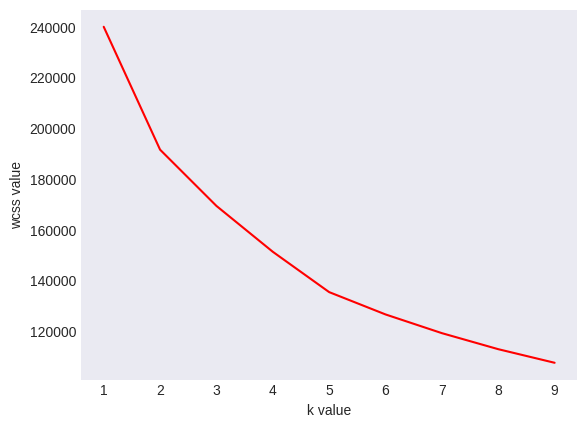

In [90]:
# Visualize;
# Visually identify the "elbow" point, where the rate of decrease in WCSS starts to slow down.
plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

In [91]:
# Final Model
# Fitted to the DataFrame data using the .fit() method, which starts the clustering process.
kmeans=KMeans(n_clusters=3,init="k-means++", n_init=10).fit(DataFrame)

In [81]:
cluster=kmeans.labels_
cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [92]:
# We've augmented our DataFrame with a new column indicating the cluster number for each data point. This allows us to easily analyze and visualize the clustering results alongside our original data.
DataFrame["cluster_no"]=cluster
DataFrame.head()

,Activity_Period,Operating_Airline,Operating_Cod,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month,cluster_no
0,200507,0,60,0,54,0,8,0,0,2,1,27271,0,27271,2005,5,0
1,200507,0,60,0,54,0,8,1,0,2,1,29131,1,29131,2005,5,0
2,200507,0,60,0,54,0,8,2,0,2,1,5415,2,10830,2005,5,0
3,200507,4,6,4,6,1,2,0,1,2,1,35156,0,35156,2005,5,0
4,200507,4,6,4,6,1,2,1,1,2,1,34090,1,34090,2005,5,0


In [85]:
DataFrame.tail(7)

,Activity_Period,Operating_Airline,Operating_Cod,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month,cluster_no
15000,201603,69,61,60,55,1,5,1,1,4,5,17521,1,17521,2016,7,0
15001,201603,71,64,62,58,0,8,0,0,3,3,186464,0,186464,2016,7,1
15002,201603,71,64,62,58,0,8,1,0,3,3,194636,1,194636,2016,7,1
15003,201603,71,64,62,58,1,5,0,0,0,0,4189,0,4189,2016,7,0
15004,201603,71,64,62,58,1,5,1,0,3,3,4693,1,4693,2016,7,0
15005,201603,72,63,63,57,1,4,0,1,0,0,12313,0,12313,2016,7,0
15006,201603,72,63,63,57,1,4,1,1,0,0,10898,1,10898,2016,7,0


Divided into clusters

In [86]:
DataFrame.cluster_no.value_counts()

cluster_no
0    13028
1     1676
2      303
Name: count, dtype: int64

We observed how many elements each set consists of

We have successfully performed the clustering operation

<a id="2"></a>
## 2.Hierarcihal Cluster

In [93]:
import scipy.cluster.hierarchy as sch

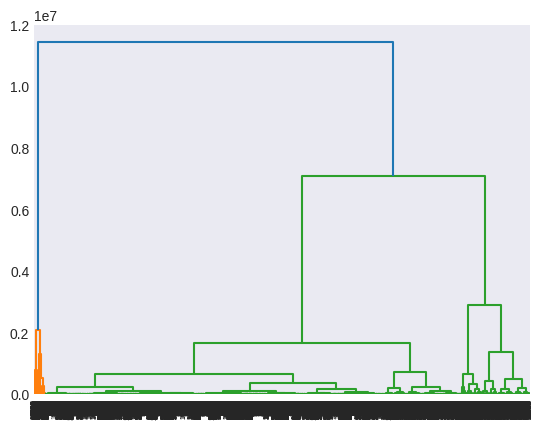

In [96]:
# generates a dendrogram using hierarchical clustering with the Ward method.
# It computes the linkage matrix using the Ward method and then visualizes the dendrogram using matplotlib.
# The dendrogram provides a hierarchical representation of the clusters in the data, showing how they merge together at different distances.
dendogram=sch.dendrogram(sch.linkage(DataFrame,method="ward"))
plt.show()

<a id="3"></a>
## 3.Conclusion

We performed clustering using the Airlines Traffic Passenger Statistics dataset.
Our aim is to divide the flights into clusters based on their similarities, based on their different characteristics.

This dataset contains information about air traffic passenger statistics by airline. It contains information about airlines, airports and regions from which flights depart and arrive. It also contains information about the type of activity, price category, terminal, boarding area and number of passengers.